<a href="https://colab.research.google.com/github/LibbyFender/Learning/blob/master/SPEX650.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

American University
SPEX 650 Quantitative Analysis
May - June 2020

Ticket Time Machine Research

In [1]:
#Library imports and loading data (5/27/2020)
import pandas as pd
from sklearn import linear_model
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import seaborn as sns
sns.set_style('ticks')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Task complete 5/30/20
To-do List, connect google results directly to this form. It is currently from local .csv
df = pd.read_csv('/Survey_1Responses.csv')
/Survey_1Responses.csv  /content/drive/My Drive/Survey_1Responses.gsheet

In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())


#Load dataframe from google workbook 5/30

In [0]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/XXXXXXXXXXXXXXXXXXXXX')

In [0]:
sheet = wb.worksheet('Form Responses 1')
data = sheet.get_all_values()
df = pd.DataFrame(data)

In [0]:
df.head()

,Timestamp,What is your age?,What is your current 5 digit zip or postal code?,"We are interested in learning more about what live events you enjoy. If you have never attended a type of event, feel free to skip the question. [I enjoy attending live music events.]","We are interested in learning more about what live events you enjoy. If you have never attended a type of event, feel free to skip the question. [I enjoy attending live sports.]","We are interested in learning more about what live events you enjoy. If you have never attended a type of event, feel free to skip the question. [I enjoy attending outdoor festivals.]","We are interested in learning more about what live events you enjoy. If you have never attended a type of event, feel free to skip the question. [I enjoy attending cultural events and festivals.]","We are interested in learning more about what live events you enjoy. If you have never attended a type of event, feel free to skip the question. [I enjoy attending live performances, such as theatre and dance.]","We are interested in learning more about what live events you enjoy. If you have never attended a type of event, feel free to skip the question. [When I attend a live event I buy a souvenir.]",How many live events have you attended for entertainment in the previous 18 months?,"We would like to know more about how you prefer to gain admission to live events. [When I receive a printed ticket, I save the ticketstub.]","We would like to know more about how you prefer to gain admission to live events. [If given a choice between a printed ticket or an e-ticket, I would prefer printed.]","We would like to know more about how you prefer to gain admission to live events. [If given a choice between a printed ticket or a mobile ticket, I would prefer printed.]","We would like to know more about how you prefer to gain admission to live events. [If a printed ticket is offered in addition to a mobile or e-ticket, I would want a printed ticket.]","We would like to know more about how you prefer to gain admission to live events. [If a printed ticket is available for a reasonable expense, I would purchase a printed ticket.]","Customized tickets, such as below, allow fans to add their own text to a printed ticket. [If I attend a live event with personal significance, such as a family reunion or a loved ones' first game, I will purchase a printed ticket.]","Customized tickets, such as below, allow fans to add their own text to a printed ticket. [If I attend a live event with personal significance, such as a family reunion or a loved ones' first game, I will purchase a customized printed ticket.]","Customized tickets, such as below, allow fans to add their own text to a printed ticket. [If I attend a live event with significance to the team or performer, such as a no-hitter, I will purchase a printed ticket.]","Customized tickets, such as below, allow fans to add their own text to a printed ticket. [If I attend a live event with significance to the team or performer, such as a no hitter, I will purchase a customized ticket.]","Customized tickets, such as below, allow fans to add their own text to a printed ticket. [If I was not in attendance when a significant event occurred for the team or performer, I will purchase a printed ticket.]","Customized tickets, such as below, allow fans to add their own text to a printed ticket. [If I was not in attendance when a significant event occurred for the team or performer, I will purchase a customized ticket.]",When might you buy a custom ticket?,Anything else you think we should know? Feel free to share:
0,5/26/2020 22:19:45,35-44,98056.0,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,Agree,Agree,7-9,Often,Often,Often,Always,Some events,Often,Some events,Rarely,Some events,Some events,Rarely,"First Date, Rivalry Game, testing","This is Libby, testing the form and feedback!"
1,5/26/2020 22:58:21,25-34,NaN,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,St

5/30/20 Update: when connecting directly from gsheet, column names become first row of data. I will need to either research how to ID column names directly in google sheet, or correct here.

5/28 note: Updating column names for ease of use. Current column names are questions from survey.
5/30 note: not ideal method for a google sheet.

# Load dataframe from local .csv

In [0]:
df = pd.read_csv('Survey 1.csv')
# /Survey_1Responses.csv /content/drive/My Drive/Survey_1Responses.gsheet

In [5]:
df.shape

(97, 23)

In [0]:
columns = ['quizTaken', 'age', 'zip', 'enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture', 'enjoy_performances', 'buy_souvenir', 'event_att', 'save_stub', 'prefer1', 'prefer2', 'want_printed', 'buy_printed', 'ps_printed', 'ps_cust', 'ts_printed', 'ts_cust','na_printed', 'na_cust', 'when_cust', 'open']
df = df.iloc[1:] #Observations in Row 1 deleted. They are my responses from testing the form and entering random gibberish.

In [7]:
print(len(columns), len(df.columns))

23 23


In [0]:
df.columns =columns

In [9]:
df.head(3)

,quizTaken,age,zip,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir,event_att,save_stub,prefer1,prefer2,want_printed,buy_printed,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust,when_cust,open
1,2020/05/26 11:58:21 PM MDT,25-34,NaN,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,Strongly Agree,Agree,13 or more.,Often,Rarely,Rarely,Often,Never,Rarely,Some events,Rarely,Rarely,Never,Never,NaN,NaN
2,2020/05/27 12:28:55 AM MDT,35-44,83712.0,Disagree,Agree,Strongly Disagree,Agree,Neither Agree nor Disagree,Disagree,0 - 1,Never,Never,Never,Never,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Rarely,Enlightening or life changing experience,NaN
3,2020/05/27 12:47:13 AM MDT,45-54,98056.0,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,2-3,Never,Rarely,Rarely,Some events,Never,Some events,Some events,Rarely,Rarely,Never,Never,"First Concert, game or event;Family Vacation;F...",You are swell!


In [10]:
#5/28 Notes As expected, zip is a float, all other items are object types. We need to change to numerical values and address null value in zip code.
df.info()
#5/30 Notes: when loaded from a google sheet, null values are not flagged as null, and all items, including zip code are object type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 1 to 96
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   quizTaken           96 non-null     object 
 1   age                 95 non-null     object 
 2   zip                 89 non-null     float64
 3   enjoy_music         95 non-null     object 
 4   enjoy_sports        95 non-null     object 
 5   enjoy_outdoor       95 non-null     object 
 6   enjoy_culture       95 non-null     object 
 7   enjoy_performances  95 non-null     object 
 8   buy_souvenir        95 non-null     object 
 9   event_att           96 non-null     object 
 10  save_stub           95 non-null     object 
 11  prefer1             94 non-null     object 
 12  prefer2             94 non-null     object 
 13  want_printed        95 non-null     object 
 14  buy_printed         95 non-null     object 
 15  ps_printed          93 non-null     object 
 16  ps_cust   

In [11]:
print(df.zip.describe(), df.zip.sum())
#Min and Max suggest acceptable range. Sum is a whole number, which suggests whole numbers.
#5/30 Note, because zip now an object, the sum combines them like a string. This code does not make sense after adjusting to sheet upload.
#6/9/20 A well connected member of my network elevated the profile of the survey, and now I have a much larger dataset. I did not address null values in some inputs because I didn't have any. Data will require much more cleaning now, but... We have a better sample

count       89.000000
mean     56671.910112
std      35364.865142
min          0.000000
25%      22042.000000
50%      60069.000000
75%      92780.000000
max      99336.000000
Name: zip, dtype: float64 5043800.0


In [12]:
print(len(df.quizTaken), df.quizTaken.max(), df.quizTaken.min())

96 2020/06/12 10:14:05 AM MDT 2020/05/26 11:58:21 PM MDT


In [0]:
df.zip.fillna('00000', inplace=True)

In [0]:
df['zip'] = df.zip.astype(int)

In [15]:
df.info()
#5/30 I'm thinking more about this... Zip codes are categorial, not integers. They hold no rank, but lower number is East Coast and higher number is West coast.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 1 to 96
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   quizTaken           96 non-null     object
 1   age                 95 non-null     object
 2   zip                 96 non-null     int64 
 3   enjoy_music         95 non-null     object
 4   enjoy_sports        95 non-null     object
 5   enjoy_outdoor       95 non-null     object
 6   enjoy_culture       95 non-null     object
 7   enjoy_performances  95 non-null     object
 8   buy_souvenir        95 non-null     object
 9   event_att           96 non-null     object
 10  save_stub           95 non-null     object
 11  prefer1             94 non-null     object
 12  prefer2             94 non-null     object
 13  want_printed        95 non-null     object
 14  buy_printed         95 non-null     object
 15  ps_printed          93 non-null     object
 16  ps_cust             92 non-n

In [16]:
df.groupby('age').agg('count').iloc[:, 2:6]
#Our target market is 25-54, and we have 17 responses (5/27) in that range. (-1 that is mine for testing purposes) This is good news for us. Course requirements are met.
#5/30 update: 23 responses in our target market, 27 total responses. We can see count of responses by age. This tells me that null values for this bank of questions are from respondants outside of our target demographic, 25-54.

,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture
age,,,,
18-24,3,3,3,3
25-34,20,21,21,21
35-44,35,35,35,35
45-54,25,25,25,25
55-64,9,8,8,8
65+,2,2,2,2


Bar Chart (Column Chart) showing frequency of age groups within our target market.

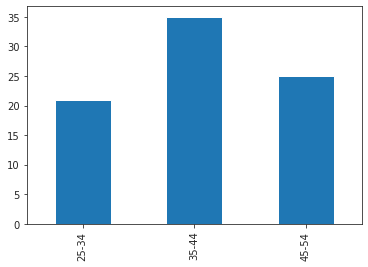

In [17]:
age_bins = ['25-34', '35-44', '45-54']
df.age.value_counts().loc[age_bins].plot(kind='bar')

I'm just playing around, and unlikely to keep most of this:

In [0]:
age_group = df.groupby('age').agg('count').iloc[:, 2:7]

In [20]:
age_group

,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances
age,,,,,
18-24,3,3,3,3,3
25-34,20,21,21,21,21
35-44,35,35,35,35,35
45-54,25,25,25,25,25
55-64,9,8,8,8,8
65+,2,2,2,2,2


In [0]:
enjoy =age_group.transpose()

In [22]:
#Count of responses, not valued As of 6/2/20 no null values in our target demographic
enjoy

age,18-24,25-34,35-44,45-54,55-64,65+
enjoy_music,3,20,35,25,9,2
enjoy_sports,3,21,35,25,8,2
enjoy_outdoor,3,21,35,25,8,2
enjoy_culture,3,21,35,25,8,2
enjoy_performances,3,21,35,25,8,2


This is a count of responses, and not an indication of responses!! Need to clean up later! 6/6/20 Done

In [0]:
#Reducing data to focus on target market, as defined by age
df['target'] =df['age'].isin(['25-34', '35-44', '45-54'])

In [27]:
df.shape #6/9/20 Dropped 9 observations due to age outside boundary 6/13 dropped 15

(81, 24)

In [0]:
df = df[df['target']==True] #6/2 Notes, this could have been done without replacing target with 0,1 notation. 6/3 Note: Resolved

In [0]:
#Creating a replicable framework for graphing our results
order = ['Strongly Agree', 'Agree',	'Neither Agree nor Disagree', 'Disagree', 'Strongly Disagree' ]

def plot_test(data, ques_name, age_bin, order = order, ax=None):
  plot_df = data[[ques_name, 'age']]
#frequency for each age group
  plotting_data = plot_df[plot_df['age'] == age_bin][ques_name].value_counts()
  sns.barplot(y =plot_df.index,
              x= plot_df.values,
              order=order,
              ax = ax,
              palette = 'Spectral',
              edgecolor ='black'
              ).set_title("Age")

##5/28 Data Cleaning with 2nd round of data collection

In [28]:
df['enjoy_music'].describe()

count                 80
unique                 5
top       Strongly Agree
freq                  42
Name: enjoy_music, dtype: object

#Playing with VIZ

H1: If presented with an opportunity, attendees will purchase physical tickets to live events as a collectable souvenir.
H0: Attendees will not purchase souvenir tickets to events when presented an opportunity to buy.

KeyError: ignored

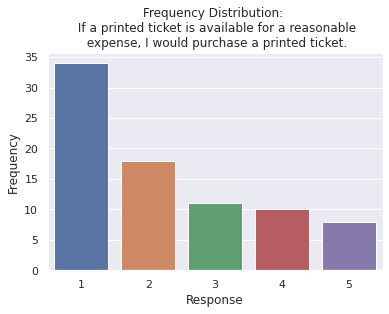

In [118]:
buy_printed = df['buy_printed'].value_counts()
sns.set(style='darkgrid')
sns.barplot(buy_printed.index, buy_printed.values)
plt.title('Frequency Distribution: \n If a printed ticket is available for a reasonable\n expense, I would purchase a printed ticket.')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Response', fontsize=12)
#plt.text(buy_printed.index[1], buy_printed.values[0]+0.2, s=buy_printed.values[0], size= 6)
for i in range(len(buy_printed.values)):
  plt.text((i)-0.1, buy_printed[i]+.2, s=buy_printed[i])
plt.show()

In [30]:
df['buy_souvenir'].describe()

count                             81
unique                             5
top       Neither Agree nor Disagree
freq                              24
Name: buy_souvenir, dtype: object

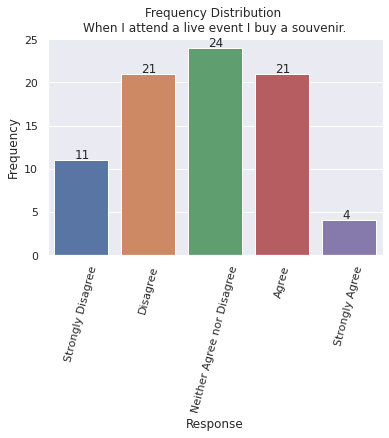

In [31]:
likert_order=['Strongly Disagree', 'Disagree', 'Neither Agree nor Disagree', 'Agree', 'Strongly Agree']
buy_souvenir = df['buy_souvenir'].value_counts().loc[likert_order]
sns.set(style='darkgrid')
sns.barplot(buy_souvenir.index, buy_souvenir.values)
plt.title('Frequency Distribution \nWhen I attend a live event I buy a souvenir.')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Response', fontsize=12)
plt.xticks(rotation=75)
for i in range(len(buy_souvenir.values)):
  plt.text((i)-0.1, buy_souvenir[i]+.2, s=buy_souvenir[i])
plt.show()

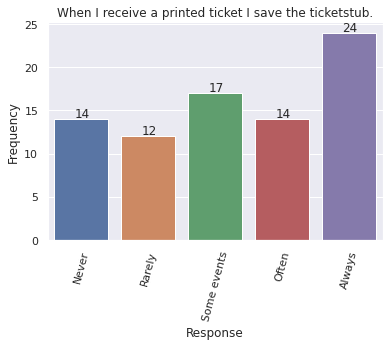

In [33]:
likert_2 = ['Never', 'Rarely', 'Some events', 'Often', 'Always']
save_stub = df['save_stub'].value_counts().loc[likert_2]
sns.set(style='darkgrid')
sns.barplot(save_stub.index, save_stub.values)
plt.title('When I receive a printed ticket I save the ticketstub.')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Response', fontsize=12)
plt.xticks(rotation = 75)
for i in range(len(save_stub.values)):
  plt.text((i)-0.1, save_stub[i]+.2, s=save_stub[i])
plt.show()

In [34]:
# describe method dropna = true by default
df['save_stub'].describe()

count         81
unique         5
top       Always
freq          24
Name: save_stub, dtype: object

6/2 Notes: this code is unchanged from yesterday, but does not run today. This will need to be investigated later!!\n
6/3 Notes: .loc error related to 'strongly Disagree' not appearing in enjoy_music dataframe. I'm certain a work around would be easy, but it is not significant to analysis. It is enough to know value is zero. The error did not flag before, because we had not filtered the dataframe to only our target market. We had responses for each value before.

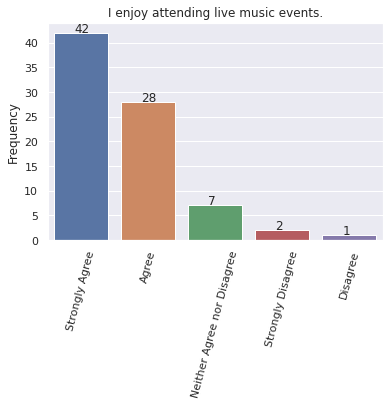

In [35]:
enjoy_music = df['enjoy_music'].value_counts()
sns.barplot(enjoy_music.index, enjoy_music.values)
plt.title('I enjoy attending live music events.')
plt.ylabel('Frequency')
#plt.xlabel('Response')
plt.xticks(rotation = 75)
for i in range(len(enjoy_music.values)):
  plt.text((i)-0.1, enjoy_music[i]+.2, s=enjoy_music[i])
plt.show()

In [0]:
enjoy_music.describe() #

count     5.000000
mean     14.400000
std      17.227884
min       1.000000
25%       1.000000
50%       5.000000
75%      26.000000
max      39.000000
Name: enjoy_music, dtype: float64

I need to find the error in likert_order. 'Agree' records twice and Disagree has no results.
5/30 Notes: Issue resolved

6/1: Playing around with plotting, unlikely to keep

# Week 5 Homework

In [0]:
from IPython import display
from ipywidgets import interact, widgets

In [0]:
#pip install IPython

In [0]:
import re
import mailbox
import csv

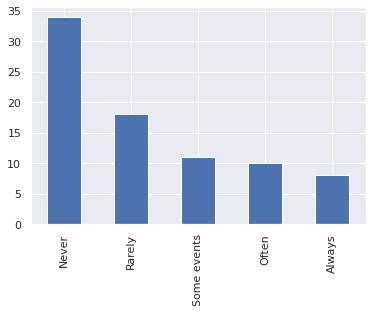

In [36]:
#Measure of Central Tendency for outcome variable, purchase a printed ticket
df['buy_printed'].value_counts().loc[likert_2].plot(
    kind='bar'

    )

In [37]:
event_order =['0 - 1', '2-3', '4-6', '7-9', '10-12', '13 or more.']
abc=pd.crosstab(df['buy_printed'], df['event_att'])
abc= abc[event_order]
abc.sort_index(level=likert_2, inplace=True)
#abc.sort_values(by=likert_2, axis=0)
abc.head()

event_att,0 - 1,2-3,4-6,7-9,10-12,13 or more.
buy_printed,,,,,,
Always,0,0,1,0,0,7
Never,3,6,13,3,2,7
Often,1,0,2,1,2,4
Rarely,0,0,5,3,1,9
Some events,1,0,5,1,0,4


Text(0.5, 1.0, 'If a printed ticket is available for a reasonable expense, I would purchase a printed ticket.')

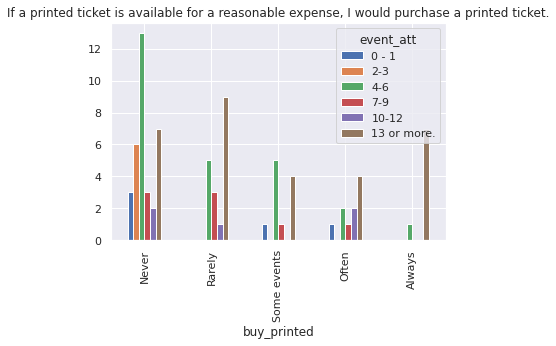

In [38]:
#Our outcome variable, buy ticket
abc.loc[likert_2].plot(kind='bar')
plt.title('If a printed ticket is available for a reasonable expense, I would purchase a printed ticket.')

This is a problem. Our desired outcome, purchasing a printed ticket, is showing limited interest among respondants who frequently attend live shows.
6/13 update: Larger sample size reduced impact.

In [0]:
def invariate(question, likert_type):
  column_frequency = df[question].value_counts().loc[likert_type]
  sns.barplot(column_frequency.index, column_frequency.values)
  abc=pd.crosstab(df['buy_printed'], df[question])
  abc=abc[likert_type]
  plt.title('Response to '+ question +'.')
  plt.ylabel('Frequency')
  plt.xlabel('Response')
  plt.xticks(rotation = 75)
  for i in range(len(column_frequency.values)):
    plt.text((i)-0.1, column_frequency[i]+.2, s=column_frequency[i])
    #print(column_frequency.sum())
  #plt.text(2.7, 16, s='no response='+ (72-(column_frequency.sum())))
  plt.show()
  print(abc.head())

In [40]:
df.shape[0]

81

In [41]:
print(likert_2, likert_order, event_order)

['Never', 'Rarely', 'Some events', 'Often', 'Always'] ['Strongly Disagree', 'Disagree', 'Neither Agree nor Disagree', 'Agree', 'Strongly Agree'] ['0 - 1', '2-3', '4-6', '7-9', '10-12', '13 or more.']


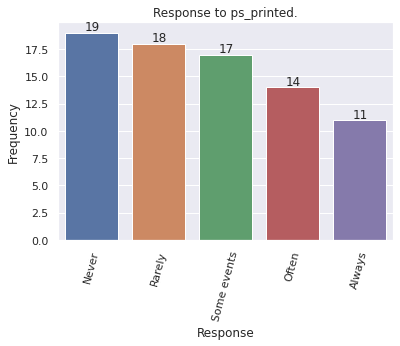

ps_printed   Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           1       0            2      0       5
Never           14      10            5      3       1
Often            0       0            5      3       2
Rarely           4       8            1      4       1
Some events      0       0            4      4       2


In [42]:
invariate('ps_printed', likert_2) # Interest in buying a printed ticket to an event with personal significance

If I attend a live event with significance to the team or performer, such as a no hitter, I will purchase a printed ticket.

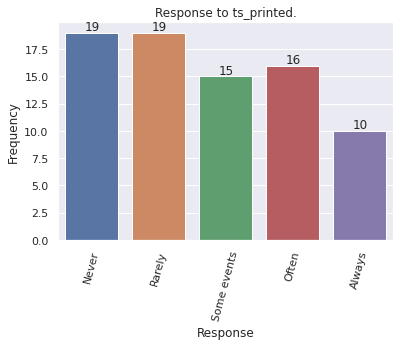

ts_printed   Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           1       0            1      2       4
Never           14      10            4      3       2
Often            0       1            3      4       2
Rarely           4       7            3      3       1
Some events      0       1            4      4       1


In [43]:
invariate('ts_printed', likert_2)

If I attend a live event with personal significance, 
such as a family reunion or a loved ones' first game,
I will purchase a customized printed ticket.


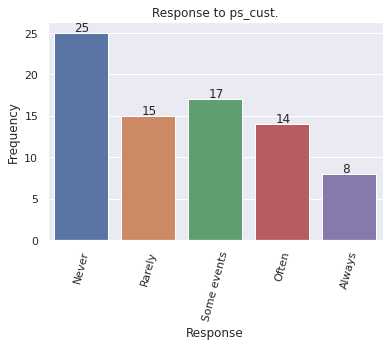

ps_cust      Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           2       0            1      2       3
Never           17       5            5      5       1
Often            2       1            3      2       2
Rarely           3       9            4      2       0
Some events      1       0            4      3       2


In [44]:
print("If I attend a live event with personal significance, \nsuch as a family reunion or a loved ones' first game,\nI will purchase a customized printed ticket.")
invariate('ps_cust', likert_2)

In [45]:
#Two-Way Table indicating Buy Souvenir and Buy Printed variables
grouped_bs = df.groupby(['buy_souvenir', 'buy_printed'])
grouped_bs.size()

buy_souvenir                buy_printed
Agree                       Always          3
                            Never           4
                            Often           4
                            Rarely          7
                            Some events     3
Disagree                    Always          1
                            Never          13
                            Often           2
                            Rarely          4
                            Some events     1
Neither Agree nor Disagree  Always          2
                            Never          10
                            Often           4
                            Rarely          5
                            Some events     3
Strongly Agree              Always          1
                            Rarely          1
                            Some events     2
Strongly Disagree           Always          1
                            Never           7
                            Rarely      

In [46]:
grouped_bs = df.groupby(['enjoy_music', 'buy_printed'])
grouped_bs.size()

enjoy_music                 buy_printed
Agree                       Always          1
                            Never          13
                            Often           4
                            Rarely          7
                            Some events     3
Disagree                    Never           1
Neither Agree nor Disagree  Never           3
                            Rarely          1
                            Some events     3
Strongly Agree              Always          6
                            Never          16
                            Often           5
                            Rarely         10
                            Some events     5
Strongly Disagree           Always          1
                            Often           1
dtype: int64

In [47]:
#Dependant Variable
df.buy_printed.describe()

count        81
unique        5
top       Never
freq         34
Name: buy_printed, dtype: object

In [0]:
Always_df=df[df['buy_printed']=="Always"]
Often_df=df[df['buy_printed']=="Often"]
Se_df=df[df['buy_printed']=="Some events"]
Rarely_df=df[df['buy_printed']=="Rarely"]
Never_df=df[df['buy_printed']=="Never"]

In [0]:
Always_list=Always_df['buy_printed'].value_counts()
Often_list=Often_df['buy_printed'].value_counts()
Se_list=Se_df['buy_printed'].value_counts()
Rarely_list=Rarely_df['buy_printed'].value_counts()
Never_list=Never_df['buy_printed'].value_counts()

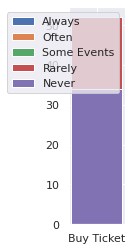

In [50]:
fig, ax = plt.subplots(figsize=(1, 4))
ax.bar('Buy Ticket', Always_list.values, bottom = 22, label='Always', width=0.85)
ax.bar('Buy Ticket', Often_list.values, bottom=21, label= 'Often', width=0.85)
ax.bar('Buy Ticket', Se_list.values, bottom=20, label='Some Events', width=0.85)
ax.bar('Buy Ticket', Rarely_list.values, bottom=Never_list.values, label= 'Rarely', width=0.85)
ax.bar('Buy Ticket', Never_list.values, bottom=0, label= 'Never', width=0.85)
ax.legend()

No handles with labels found to put in legend.


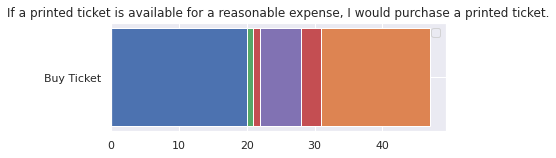

In [0]:
fig, ax = plt.subplots(figsize = (6, 2))
ax.barh('Buy Ticket', Never_list.values, .8, left=0)
ax.barh('Buy Ticket', Rarely_list.values, .79,left=Never_list.values)
ax.barh('Buy Ticket', Se_list.values, .8, left=20)
ax.barh('Buy Ticket', Often_list.values, .79, left=21)
ax.barh('Buy Ticket', Always_list.values, .8, left=22)
ax.set_title('If a printed ticket is available for a reasonable expense, I would purchase a printed ticket.')
ax.legend()

In [0]:
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

In [0]:
df_q_likert_order = df[['enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture', 'enjoy_performances', 'buy_souvenir']]
df_q_likert_2= df[['save_stub', 'prefer1', 'prefer2', 'want_printed', 'buy_printed', 'ps_printed', 'ps_cust', 'ts_printed', 'ts_cust', 'na_printed', 'na_cust']]

In [52]:
df_q_likert_2.head()

,save_stub,prefer1,prefer2,want_printed,buy_printed,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust
1,Often,Rarely,Rarely,Often,Never,Rarely,Some events,Rarely,Rarely,Never,Never
2,Never,Never,Never,Never,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Rarely
3,Never,Rarely,Rarely,Some events,Never,Some events,Some events,Rarely,Rarely,Never,Never
4,Rarely,Rarely,Rarely,Rarely,Never,Rarely,Never,Never,Never,Never,Never
6,Always,Some events,Some events,Often,Never,Always,Always,Some events,Some events,Never,Never


In [164]:
df_q_likert_2.head()

,Never,Rarely,Some events,Often,Always
save_stub,14,12,17,14,24
prefer1,13,16,18,11,23
prefer2,15,17,19,13,17
want_printed,16,14,15,14,22
buy_printed,34,18,11,10,8


I am essentially transposing the dataframe to lend itself to data Viz

In [0]:
#pd.get_dummies(df.stack()).groupby(level=1).sum()
#df.values
v = df_q_likert_2.values
n, m = v.shape
f, u = pd.factorize(v.ravel())

df_q_likert_2 = pd.DataFrame(
    np.eye(u.size, dtype=int)[f].reshape(n, m, -1).sum(0),
    df_q_likert_2.columns, u
)
v = df_q_likert_order.values
n, m = v.shape
f, u = pd.factorize(v.ravel())

df_q_likert_order = pd.DataFrame(
    np.eye(u.size, dtype=int)[f].reshape(n, m, -1).sum(0),
    df_q_likert_order.columns, u
)

In [0]:
df_q_likert_2 = df_q_likert_2[likert_2]
df_q_likert_order = df_q_likert_order[likert_order]

In [56]:
df_q_likert_2.shape #Describes interest in product

(11, 5)

In [57]:
df_q_likert_2.describe()

,Never,Rarely,Some events,Often,Always
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,27.272727,14.727273,14.181818,11.454545,13.363636
std,16.371261,3.466725,4.556713,3.856518,7.228731
min,13.000000,9.000000,6.000000,4.000000,4.000000
25%,15.500000,13.000000,13.000000,10.500000,9.000000
50%,19.000000,15.000000,15.000000,13.000000,12.000000
75%,32.000000,17.500000,17.000000,14.000000,19.500000
max,58.000000,19.000000,19.000000,16.000000,24.000000


In [58]:
df_q_likert_2[5:11] #Describes our sample population

,Never,Rarely,Some events,Often,Always
ps_printed,19,18,17,14,13
ps_cust,25,15,17,14,10
ts_printed,19,19,15,16,12
ts_cust,30,15,15,11,10
na_printed,57,9,6,5,4
na_cust,58,9,6,4,4


([<matplotlib.axis.XTick at 0x7f0732400080>,
 [Text(0, 0, 'Personal significance|\nGeneric Printed'),
  Text(0, 0, 'Personal significance|\nCustom Printed'),
  Text(0, 0, 'Team significance|\nGeneric Printed'),
  Text(0, 0, 'Team significance|\nCustom Printed')])

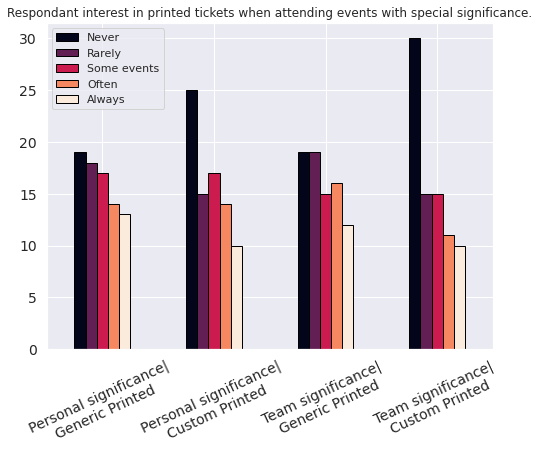

In [59]:
jibberish = ('Personal significance|\nGeneric Printed', 'Personal significance|\nCustom Printed', 'Team significance|\nGeneric Printed', 'Team significance|\nCustom Printed')
y_posit = np.arange(len(jibberish))
df_q_likert_2[5:9].plot(
    kind='bar',
    figsize=(8, 6),
    cmap='rocket',
    edgecolor='black',
    fontsize=14,
    title='Respondant interest in printed tickets when attending events with special significance.'
    ).yaxis.label.set_visible(False)
plt.xticks(y_posit, jibberish, rotation = 25)

In [142]:
df_q_likert_order[4:7]

,Strongly Disagree,Disagree,Neither Agree nor Disagree,Agree,Strongly Agree
enjoy_performances,5,5,15,33,23
buy_souvenir,11,21,24,21,4


This needs to be updated with larger dataset. Current values are hard coded

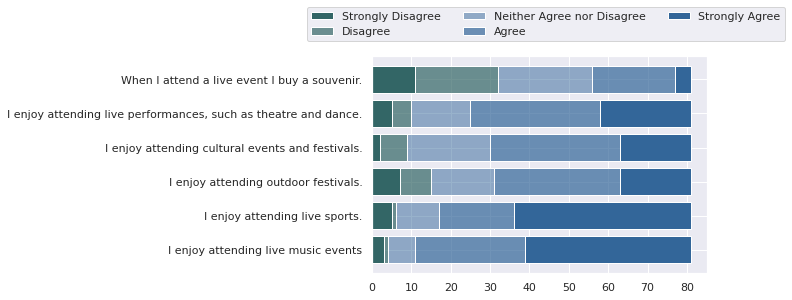

In [144]:
question_labels = ('I enjoy attending live music events', 'I enjoy attending live sports.', 'I enjoy attending outdoor festivals.', 'I enjoy attending cultural events and festivals.', 'I enjoy attending live performances, such as theatre and dance.', 'When I attend a live event I buy a souvenir.')

#question_labels[0] Enjoy Music
plt.barh(question_labels[0], width=3, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[0], left=3, width=1, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[0], left=4, width=7, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[0], left=11, width=28., color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[0], left=39, width=42., color=(0.2, 0.4, .6, 1))
#question_labels[1] Enjoy Sports
plt.barh(question_labels[1], width=5, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[1], left=5, width=1, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[1], left=6, width=11, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[1], left=17, width=19., color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[1], left=36, width=45., color=(0.2, 0.4, .6, 1))
#question_labels[2] Enjoy Outdoor
plt.barh(question_labels[2], width=7, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[2], left=7, width=8, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[2], left=15, width=16, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[2], left=31, width=32, color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[2], left=63, width=18, color=(0.2, 0.4, .6, 1))
#question_labels[3] Enjoy Culture
plt.barh(question_labels[3], width=2, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[3], left=2, width=7, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[3], left=9, width=21, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[3], left=30, width=33., color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[3], left=63, width=18, color=(0.2, 0.4, .6, 1))
#question_labels[4] Enjoy Performances
plt.barh(question_labels[4], width=5, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[4], left=5, width=5, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[4], left=10, width=15, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[4], left=25, width=33., color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[4], left=58, width=23., color=(0.2, 0.4, .6, 1))
#question_labels[5] Buy Souvenir
plt.barh(question_labels[5], width=11, color=(0.2, 0.4, 0.4, 1))
plt.barh(question_labels[5], left=11, width=21, color=(0.2, 0.4, 0.4, .7))
plt.barh(question_labels[5], left=32, width=24, color=(0.2, .4, 0.6, .5))
plt.barh(question_labels[5], left=56, width=21, color=(0.2, 0.4, .6, .7))
plt.barh(question_labels[5], left=77, width=4., color=(0.2, 0.4, .6, 1))

#Add Legend to plot
# plt.text(-1,6, 'Strongly \nDisagree', color=(0.2, 0.4, 0.4, 1))
# plt.text(4,6.2, likert_order[1], color=(0.2, 0.4, 0.4, .7))
# plt.text(11,6, 'Neither Agree \nnor Disagree', color=(0.2, 0.4, 0.6, .5))
# plt.text(18, 6.2, likert_order[3], color=(0.2, 0.4, .6, .7))
# plt.text(22,6, 'Strongly \nAgree', color=(0.2, 0.4, 0.6, 1))
plt.legend(likert_order, ncol=3, bbox_to_anchor=(1.25, 1.25))
plt.show()

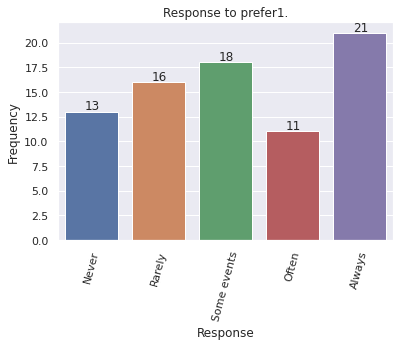

prefer1      Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           1       0            0      0       7
Never           11      11            5      3       2
Often            0       1            2      3       4
Rarely           0       4            6      4       4
Some events      1       0            5      1       4


In [61]:
invariate('prefer1', likert_2)

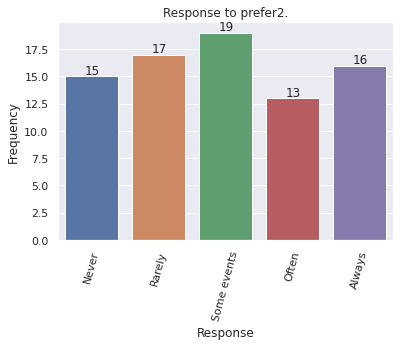

prefer2      Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           1       0            1      0       6
Never           13      14            3      3       1
Often            0       1            1      5       3
Rarely           0       2            9      3       3
Some events      1       0            5      2       3


In [62]:
invariate('prefer2', likert_2)

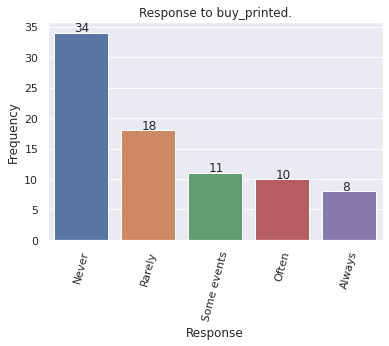

buy_printed  Never  Rarely  Some events  Often  Always
buy_printed                                           
Always           0       0            0      0       8
Never           34       0            0      0       0
Often            0       0            0     10       0
Rarely           0      18            0      0       0
Some events      0       0           11      0       0


In [63]:
invariate('buy_printed', likert_2)

In [64]:
df_q_likert_2[4:5].values

array([[34, 18, 11, 10,  8]])

 Test of Significance -> It is important to note that we have less than 5 respondants expressing an interest in our product. This will create problems for the chi-squared test
6/9 Update: Larger Sample Size reduced concern regarding reliability

In [65]:
abc

event_att,0 - 1,2-3,4-6,7-9,10-12,13 or more.
buy_printed,,,,,,
Always,0,0,1,0,0,7
Never,3,6,13,3,2,7
Often,1,0,2,1,2,4
Rarely,0,0,5,3,1,9
Some events,1,0,5,1,0,4


In [0]:
table=pd.crosstab(df['save_stub'], df['buy_printed'])#
#table = pd.crosstab(df['buy_souvenir'], df['buy_printed'])

In [0]:
from scipy.stats import chi2_contingency, chi2


In [68]:
#Degrees of freedom: (4X4)
table

buy_printed,Always,Never,Often,Rarely,Some events
save_stub,,,,,
Always,5,8,4,4,3
Never,0,13,0,1,0
Often,2,2,3,4,3
Rarely,1,6,1,4,0
Some events,0,5,2,5,5


In [0]:
stat, p, dof, expected = chi2_contingency(table)

In [70]:
# interpret test-statistic

print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

buy_printed  Always  Never  Often  Rarely  Some events
save_stub                                             
Always            5      8      4       4            3
Never             0     13      0       1            0
Often             2      2      3       4            3
Rarely            1      6      1       4            0
Some events       0      5      2       5            5
dof=16
[[ 2.37037037 10.07407407  2.96296296  5.33333333  3.25925926]
 [ 1.38271605  5.87654321  1.72839506  3.11111111  1.90123457]
 [ 1.38271605  5.87654321  1.72839506  3.11111111  1.90123457]
 [ 1.18518519  5.03703704  1.48148148  2.66666667  1.62962963]
 [ 1.67901235  7.13580247  2.09876543  3.77777778  2.30864198]]
probability=0.950, critical=26.296, stat=32.320
Dependent (reject H0)
significance=0.050, p=0.009
Dependent (reject H0)


In [0]:
##Kruskal Wallis H-test I will need to map this using a lambda function.
from scipy.stats import mstats
df.shape
em=df['enjoy_music']
es=df['enjoy_sports']
eo=df['enjoy_outdoor']
ec=df['enjoy_culture']
ep=df['enjoy_performances']
bs=df['buy_souvenir']

In [146]:
print("Kruskal-Wallis one-way analysis of variance:")
H, pval = mstats.kruskalwallis(em, es, eo, ec, ep, bs)
print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
  print("Reject. One or more Samples influences another")
if pval > 0.05:
  print("Accept. Same Distributions")


Kruskal-Wallis one-way analysis of variance:


TypeError: ignored

In [147]:
df['when_cust'].head()

1                                                  NaN
2             Enlightening or life changing experience
3    First Concert, game or event;Family Vacation;F...
4    First Concert, game or event;Family Vacation;E...
6    First Concert, game or event;Enlightening or l...
Name: when_cust, dtype: object

#Week 6 Homework

In [0]:
df_chi= df[['enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture', 'enjoy_performances', 'buy_souvenir', 'buy_printed']]

Spearman Rho:
•	Correlation tables
•	Pearson r and Probability (p) values
•	Level of statistical significance (sig) chosen


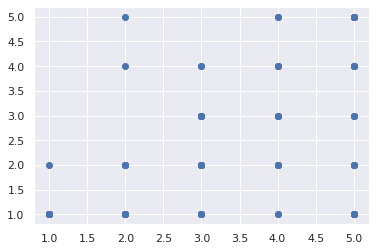

In [121]:
plt.scatter(df.save_stub, df.buy_printed) #As expected, this lacks value.

#Convert ordinal likert responses to integer values.

In [94]:
print(likert_2, likert_order) #event order

['Never', 'Rarely', 'Some events', 'Often', 'Always'] ['Strongly Disagree', 'Disagree', 'Neither Agree nor Disagree', 'Agree', 'Strongly Agree']


In [0]:
df_test = df.head()

In [115]:
df_test.replace('Strongly Agree', 5, inplace=True)
df_test.replace('Agree', 4, inplace=True)
df_test.replace('Neither Agree nor Disagree', 3, inplace=True)
df_test.replace('Disagree', 2, inplace=True)
df_test.replace('Strongly Disagree', 1, inplace=True)

df_test.replace('Always', 5, inplace=True)
df_test.replace('Often', 4, inplace=True)
df_test.replace('Some events', 3, inplace=True)
df_test.replace('Rarely', 2, inplace=True)
df_test.replace('Never', 1, inplace=True)



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [116]:
df_test

,quizTaken,age,zip,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir,event_att,save_stub,prefer1,prefer2,want_printed,buy_printed,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust,when_cust,open,target
1,2020/05/26 11:58:21 PM MDT,25-34,0,5,5,4,3,5,4,13 or more.,4,2,2,4,1,2,3,2,2,1,1,NaN,NaN,True
2,2020/05/27 12:28:55 AM MDT,35-44,83712,2,4,1,4,3,2,0 - 1,1,1,1,1,1,2,2,2,2,2,2,Enlightening or life changing experience,NaN,True
3,2020/05/27 12:47:13 AM MDT,45-54,98056,5,4,5,5,4,3,2-3,1,2,2,3,1,3,3,2,2,1,1,"First Concert, game or event;Family Vacation;F...",You are swell!,True
4,2020/05/27 1:41:29 AM MDT,35-44,98404,4,3,4,4,4,4,4-6,2,2,2,2,1,2,1,1,1,1,1,"First Concert, game or event;Family Vacation;E...",NaN,True
6,2020/05/27 4:16:19 AM MDT,35-44,33837,5,3,5,5,5,2,2-3,5,3,3,4,1,5,5,3,3,1,1,"First Concert, game or event;Enlightening or l...",NaN,True


In [0]:
df.replace('Strongly Agree', 5, inplace=True)
df.replace('Agree', 4, inplace=True)
df.replace('Neither Agree nor Disagree', 3, inplace=True)
df.replace('Disagree', 2, inplace=True)
df.replace('Strongly Disagree', 1, inplace=True)

df.replace('Always', 5, inplace=True)
df.replace('Often', 4, inplace=True)
df.replace('Some events', 3, inplace=True)
df.replace('Rarely', 2, inplace=True)
df.replace('Never', 1, inplace=True)

In [119]:
df.describe()

,zip,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir,save_stub,prefer1,prefer2,want_printed,buy_printed,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust
count,81.000000,80.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,79.000000,80.000000,81.000000,81.000000,79.000000,79.000000,79.000000,77.000000,79.000000,79.000000
mean,53066.123457,4.337500,4.209877,3.567901,3.716049,3.790123,2.827160,3.271605,3.139241,2.975000,3.148148,2.259259,2.746835,2.556962,2.734177,2.324675,1.556962,1.518987
std,36671.408419,0.885091,1.126011,1.193087,0.990386,1.114855,1.115685,1.466393,1.438787,1.395971,1.492574,1.376388,1.372517,1.365761,1.365405,1.332208,1.046935,1.010975
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,20015.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,46774.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,91915.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,3.000000,2.000000,2.000000
max,99336.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 1 to 92
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   quizTaken           81 non-null     object 
 1   age                 81 non-null     object 
 2   zip                 81 non-null     int64  
 3   enjoy_music         80 non-null     float64
 4   enjoy_sports        81 non-null     int64  
 5   enjoy_outdoor       81 non-null     int64  
 6   enjoy_culture       81 non-null     int64  
 7   enjoy_performances  81 non-null     int64  
 8   buy_souvenir        81 non-null     int64  
 9   event_att           81 non-null     object 
 10  save_stub           81 non-null     int64  
 11  prefer1             79 non-null     float64
 12  prefer2             80 non-null     float64
 13  want_printed        81 non-null     int64  
 14  buy_printed         81 non-null     int64  
 15  ps_printed          79 non-null     float64
 16  ps_cust   

Why would some be integers and some floats? This feels odd...

In [0]:
from scipy.stats import spearmanr

In [0]:
coef, p = spearmanr(df.buy_printed, df.save_stub)

In [125]:
coef

0.42822088903362615

In [126]:
p

6.663732642976086e-05

In [127]:
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.428
Samples are correlated (reject H0) p=0.000


In [128]:
coef, p = spearmanr(df.buy_printed, df.buy_souvenir)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.358
Samples are correlated (reject H0) p=0.001


In [131]:
df[['enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture', 'enjoy_performances']].corr()

,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances
enjoy_music,1.000000,0.476054,0.434596,0.226308,0.277167
enjoy_sports,0.476054,1.000000,0.449835,0.177405,0.145059
enjoy_outdoor,0.434596,0.449835,1.000000,0.339172,0.241090
enjoy_culture,0.226308,0.177405,0.339172,1.000000,0.500084
enjoy_performances,0.277167,0.145059,0.241090,0.500084,1.000000


From Docs
 with sns.axes_style("white"):  
    ...     f, ax = plt.subplots(figsize=(7, 5))  
    ...     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True) 

In [163]:
df.head()

,quizTaken,age,zip,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir,event_att,save_stub,prefer1,prefer2,want_printed,buy_printed,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust,when_cust,open,target
1,2020/05/26 11:58:21 PM MDT,25-34,0,5.0,5,4,3,5,4,13 or more.,4,2.0,2.0,4,1,2.0,3.0,2.0,2.0,1.0,1.0,NaN,NaN,True
2,2020/05/27 12:28:55 AM MDT,35-44,83712,2.0,4,1,4,3,2,0 - 1,1,1.0,1.0,1,1,2.0,2.0,2.0,2.0,2.0,2.0,Enlightening or life changing experience,NaN,True
3,2020/05/27 12:47:13 AM MDT,45-54,98056,5.0,4,5,5,4,3,2-3,1,2.0,2.0,3,1,3.0,3.0,2.0,2.0,1.0,1.0,"First Concert, game or event;Family Vacation;F...",You are swell!,True
4,2020/05/27 1:41:29 AM MDT,35-44,98404,4.0,3,4,4,4,4,4-6,2,2.0,2.0,2,1,2.0,1.0,1.0,1.0,1.0,1.0,"First Concert, game or event;Family Vacation;E...",NaN,True
6,2020/05/27 4:16:19 AM MDT,35-44,33837,5.0,3,5,5,5,2,2-3,5,3.0,3.0,4,1,5.0,5.0,3.0,3.0,1.0,1.0,"First Concert, game or event;Enlightening or l...",NaN,True


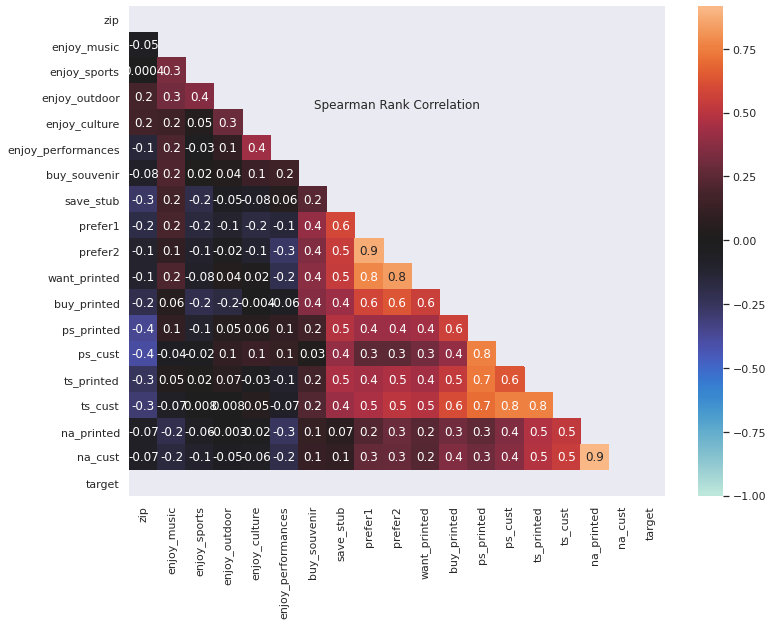

In [177]:
tri= np.triu(df.corr())
f, ax =plt.subplots(figsize=(12,9))
plt.title('Spearman Rank Correlation', pad=-102, loc='center')
ax = sns.heatmap(df.corr(method='spearman'), annot= True, fmt='.1g', mask=tri, vmin=-1, center=0)


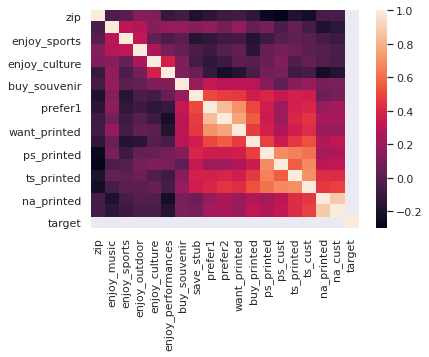

In [149]:
sns.heatmap(df.corr(method='kendall'))

In [0]:
## From earlier analysis:
df_attributes = df[['enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture', 'enjoy_performances', 'buy_souvenir']]
df_behaviors= df[['save_stub', 'prefer1', 'prefer2', 'want_printed', 'buy_printed', 'ps_printed', 'ps_cust', 'ts_printed', 'ts_cust', 'na_printed', 'na_cust']]

Correlations of this data may help us understand our key customers, and the types of events they attend

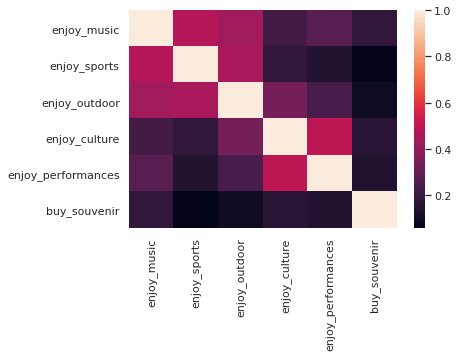

In [166]:
sns.heatmap(df_attributes.corr())

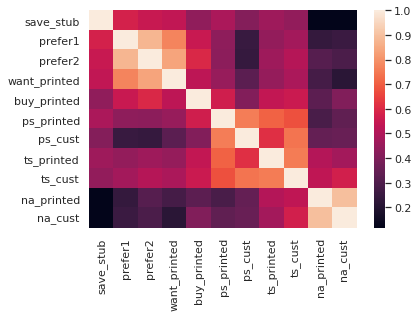

In [167]:
sns.heatmap(df_behaviors.corr())

In [168]:
df_attributes.head()

,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir
1,5.0,5,4,3,5,4
2,2.0,4,1,4,3,2
3,5.0,4,5,5,4,3
4,4.0,3,4,4,4,4
6,5.0,3,5,5,5,2
